# **Checking For Null Values**

The dataset is already download in .csv format

# **IMPORTING THE PACKAGE**

In [1]:
import numpy as np 
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# **Load the dataset**

In [2]:
df=pd.read_csv("/content/loan_prediction.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

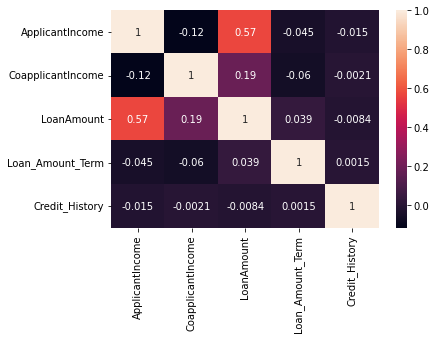

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

df.corr()
#plotting the correlation
plt.figure(1)
sns.heatmap(df.corr(), annot = True)

# **Handle the Missing values**

In [6]:
#checking the null
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [7]:
#checking the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

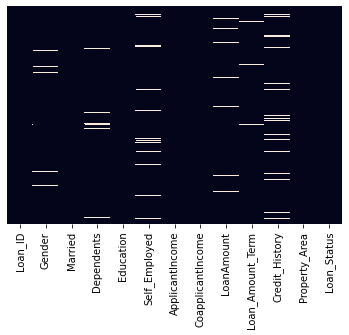

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

# **Treating the Null Value**

We will fill the missing values in numeric data type using the mean value of that particular column and categorical data type using the most repeated value

In [9]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns

In [10]:
numerical_features

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [11]:
categorical_features

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [13]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [14]:
#replace + with non value 
df['Dependents'] = df['Dependents'].str.replace('+','')

In [15]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [16]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [17]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])

In [18]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [19]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [20]:
#checking the null values now
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

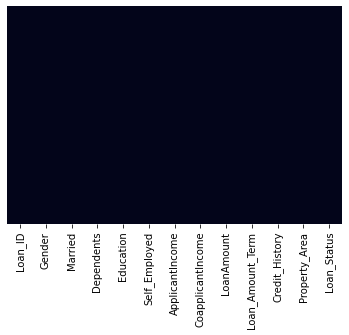

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

Now the null value is retreated